<h1>TAREA 2</h1>
<h2>Sergio Alejandro Diaz Pinilla</h2>
<h2>Julian Camilo Mendez Corredor</h2>
<br>
<br>
<h2>Punto 1</h2>

<p>Implemente (busque) un código para determinar, en el caso de señales bidimensionales (imágenes), alguna de las siguientes transformadas:</p>
  <li>Transformada de Hartley.</li>
  <li>Transformada de Walsh-Hadamard.</li>


<h1 style="font-size:100%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; F. Prieto </h1>

In [115]:
%matplotlib inline
import cv2
import time
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from __future__ import division
from scipy.fftpack import dst,idst
#from scipy.fftpack import fft, fftfreq
import pywt

img = cv2.imread('Fig/face.png',0)
print "Listo"

Listo


Inicio


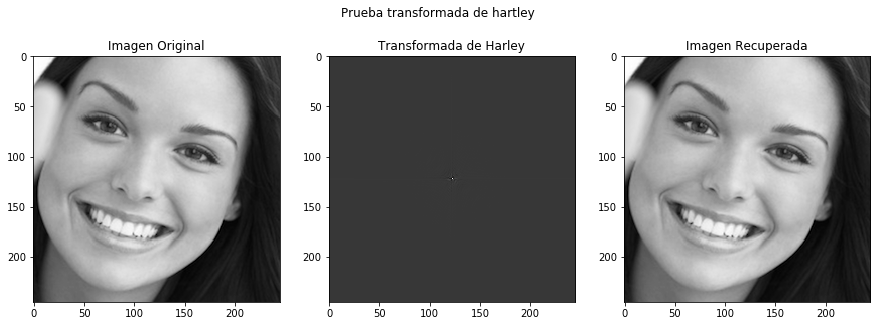

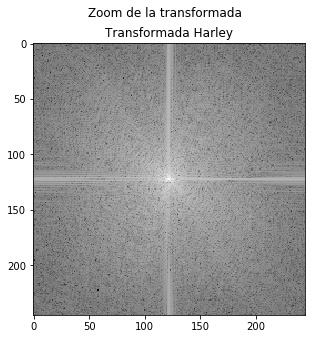

In [35]:
def ht(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    return fshift.real - fshift.imag

def iht(img):
    fshift = np.fft.ifftshift(img)
    f = np.fft.ifft2(fshift)
    return f.real + f.imag
print "Inicio"

trans = ht(img)
inv = iht(trans)

plt.figure(1,figsize=(15,5))
plt.suptitle('Prueba transformada de hartley')
plt.subplot(131), plt.imshow(img, cmap=plt.cm.gray), plt.title('Imagen Original')
plt.subplot(132), plt.imshow(trans, cmap=plt.cm.gray), plt.title('Transformada de Harley')
plt.subplot(133), plt.imshow(np.abs(inv), cmap=plt.cm.gray), plt.title('Imagen Recuperada')
plt.show()
plt.figure(2,figsize=(5,5))
plt.suptitle('Zoom de la transformada')
plt.subplot(111), plt.imshow(20*np.log(np.abs(trans)), cmap=plt.cm.gray), plt.title('Transformada Harley')
plt.show()



<h1 style="font-size:100%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 30px;"> </h1>
<h2>Punto 2</h2>
<p>Analice detalladamente el comportamiento, de al menos cuatro de las transformadas estudiadas, cuando ellas son empleadas para compresión de imágenes. Utilice imágenes reales y sintéticas.</p>

/Users/sergiodiazpinilla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:67: ComplexWarning: Casting complex values to real discards the imaginary part


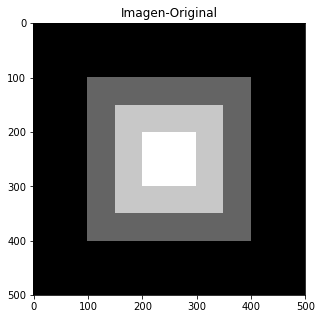

/Users/sergiodiazpinilla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:87: RuntimeWarning: divide by zero encountered in log


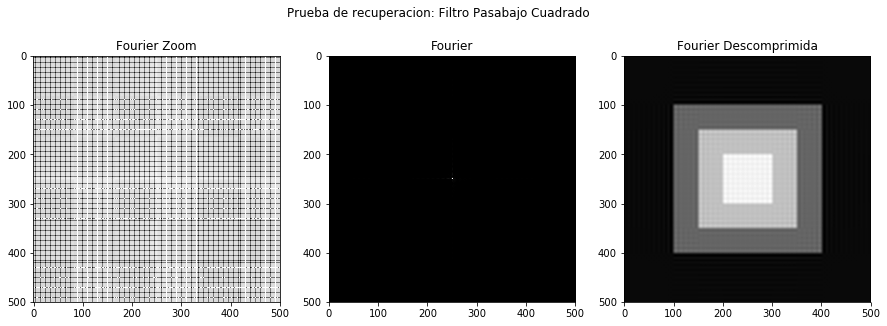

/Users/sergiodiazpinilla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:93: RuntimeWarning: divide by zero encountered in log


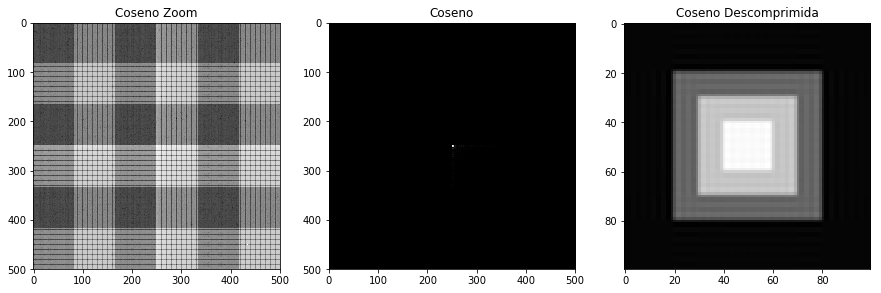

/Users/sergiodiazpinilla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:99: RuntimeWarning: divide by zero encountered in log


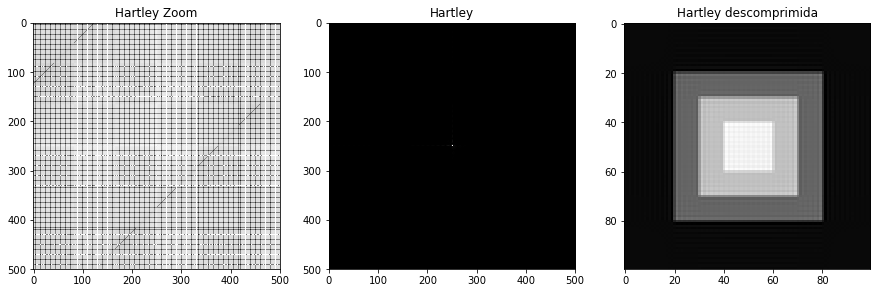

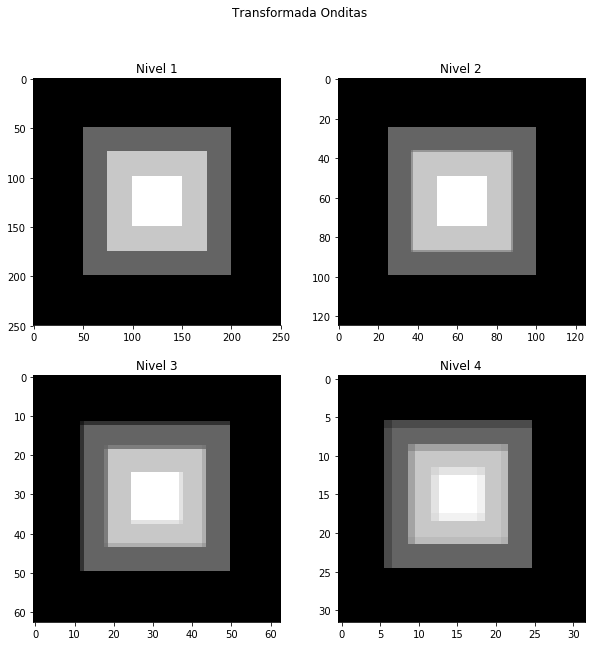

In [113]:
check = np.zeros((500, 500))
check[100:400, 100:400] = 100
check[150:350, 150:350] = 200
check[200:300, 200:300] = 255


def fft(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    return fshift

def ifft(img):
    fshift = np.fft.ifftshift(img)
    f = np.fft.ifft2(fshift)
    return f.real

def ctt(img):
    f = cv2.dct(img.astype('float32'))
    fshift = np.fft.fftshift(f)
    return fshift
def ict(img):
    fshift = np.fft.fftshift(img)
    copy = np.zeros(img.shape)
    f = cv2.dct(fshift,copy,cv2.DCT_INVERSE)
    return f

def stt(img):
    M = img.shape[0]
    N = img.shape[1]
    a = np.zeros((M,N))
    b = np.zeros((M,N))

    for i in range(M):
        a[i,:] = dst(img[i,:])
    for j in range(N):
        b[:,j] = dst(a[:,j])
    b = np.fft.fftshift(b)
    return b

def ist(img):
    fshift = np.fft.fftshift(img)
    M = fshift.shape[0]
    N = fshift.shape[1]
    a = np.zeros((M,N))
    y = np.zeros((M,N))

    for i in range(M):
        a[i,:] = idst(fshift[i,:])
    for j in range(N):
        y[:,j] = idst(a[:,j])

    return y


def w2d(img, mode='haar', level=4):
    #convert to float
    imArray =  np.float32(img)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    return coeffs
img_1_compreced = np.zeros((500, 500))

#Transformada de fourier
img_1 = fft(check)
img_1_compreced[200:300, 200:300] = img_1[200:300, 200:300]

img_1_descompreced = ifft(img_1_compreced)

#Transformada del coseno
img_2 = ctt(check)
img_2_compreced = img_2[200:300, 200:300]
img_2_descompreced = ict(img_2_compreced)

#Transformada de harley
img_3 = ht(check)
img_3_compreced = img_3[200:300, 200:300]
img_3_descompreced = iht(img_3_compreced)
plt.figure(1,figsize=(5,5))

plt.subplot(111), plt.imshow(check, cmap=plt.cm.gray), plt.title('Imagen-Original')
plt.show()

plt.figure(2,figsize=(15,5))
plt.suptitle('Prueba de recuperacion: Filtro Pasabajo Cuadrado')
plt.subplot(131), plt.imshow(np.log(abs(img_1)), cmap=plt.cm.gray), plt.title('Fourier Zoom')
plt.subplot(132), plt.imshow(np.abs(img_1), cmap=plt.cm.gray), plt.title('Fourier')
plt.subplot(133), plt.imshow(img_1_descompreced, cmap=plt.cm.gray), plt.title('Fourier Descomprimida')
plt.show()

plt.figure(3,figsize=(15,5))
plt.subplot(131), plt.imshow(np.log(np.abs(img_2)), cmap=plt.cm.gray), plt.title('Coseno Zoom')
plt.subplot(132), plt.imshow(np.abs(img_2), cmap=plt.cm.gray), plt.title('Coseno')
plt.subplot(133), plt.imshow(img_2_descompreced, cmap=plt.cm.gray), plt.title('Coseno Descomprimida')
plt.show()

plt.figure(4,figsize=(15,5))
plt.subplot(131), plt.imshow(np.log(np.abs(img_3)), cmap=plt.cm.gray), plt.title('Hartley Zoom')
plt.subplot(132), plt.imshow(np.abs(img_3), cmap=plt.cm.gray), plt.title('Hartley')
plt.subplot(133), plt.imshow(img_3_descompreced, cmap=plt.cm.gray), plt.title('Hartley descomprimida')
plt.show()

plt.figure(5,figsize=(10,10))
plt.suptitle('Transformada Onditas')
plt.subplot(221), plt.imshow(w2d(check,'haar',1)[0], cmap=plt.cm.gray), plt.title('Nivel 1')
plt.subplot(222), plt.imshow(w2d(check,'haar',2)[0], cmap=plt.cm.gray), plt.title('Nivel 2')
plt.subplot(223), plt.imshow(w2d(check,'haar',3)[0], cmap=plt.cm.gray), plt.title('Nivel 3')
plt.subplot(224), plt.imshow(w2d(check,'haar',4)[0], cmap=plt.cm.gray), plt.title('Nivel 4')
plt.show()




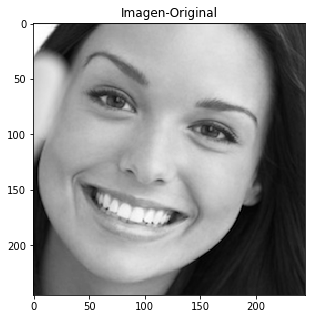

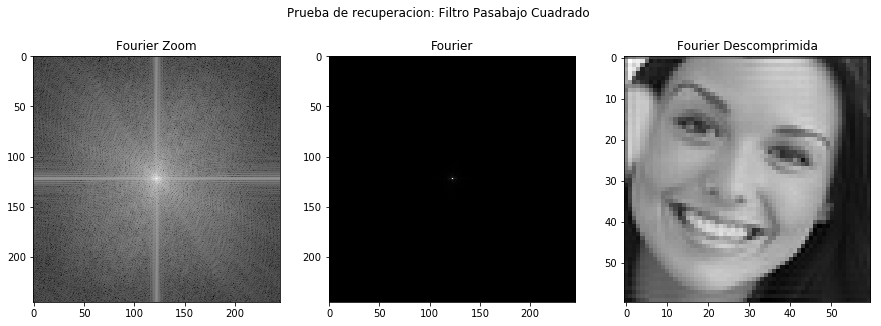

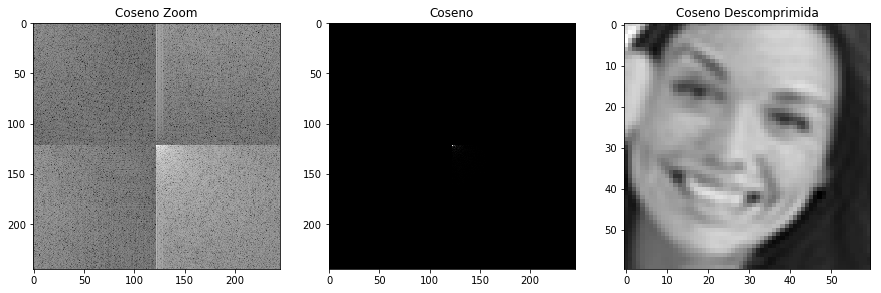

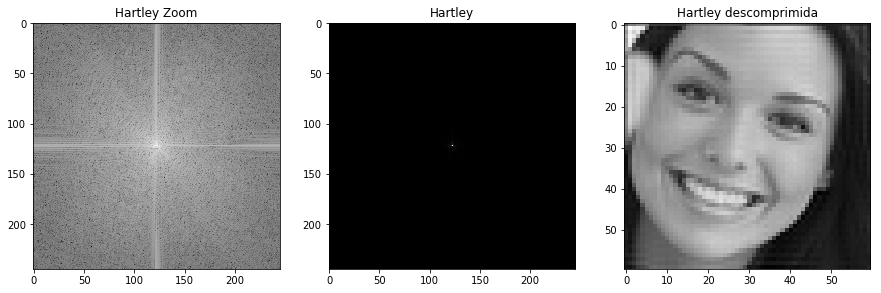

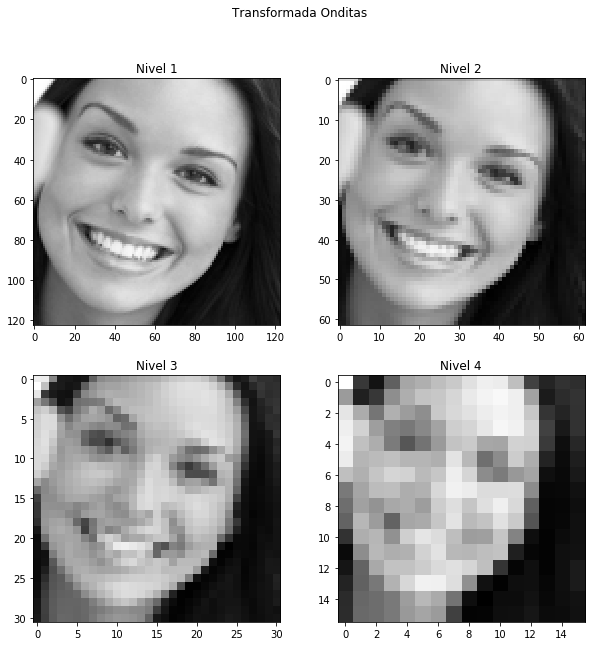

In [41]:
#img_1_compreced_r = np.zeros(img.shape)
height, width=img.shape[:2]
w_size=30
#Transformada de fourier
img_1_r = fft(img)
img_1_compreced_r= img_1_r[int(height/2)-w_size:int(height/2)+w_size, int(width/2)-w_size:int(width/2)+w_size]

img_1_descompreced_r = ifft(img_1_compreced_r)

#Transformada del coseno
img_2_r = ctt(img)
img_2_compreced_r = img_2_r[int(height/2)-w_size:int(height/2)+w_size, int(width/2)-w_size:int(width/2)+w_size]
img_2_descompreced_r = ict(img_2_compreced_r)

#Transformada de harley
img_3_r = ht(img)
img_3_compreced_r = img_3_r[int(height/2)-w_size:int(height/2)+w_size, int(width/2)-w_size:int(width/2)+w_size]
img_3_descompreced_r = iht(img_3_compreced_r)
plt.figure(1,figsize=(5,5))

plt.subplot(111), plt.imshow(img, cmap=plt.cm.gray), plt.title('Imagen-Original')
plt.show()

plt.figure(2,figsize=(15,5))
plt.suptitle('Prueba de recuperacion: Filtro Pasabajo Cuadrado')
plt.subplot(131), plt.imshow(np.log(abs(img_1_r)), cmap=plt.cm.gray), plt.title('Fourier Zoom')
plt.subplot(132), plt.imshow(np.abs(img_1_r), cmap=plt.cm.gray), plt.title('Fourier')
plt.subplot(133), plt.imshow(img_1_descompreced_r, cmap=plt.cm.gray), plt.title('Fourier Descomprimida')
plt.show()

plt.figure(3,figsize=(15,5))
plt.subplot(131), plt.imshow(np.log(np.abs(img_2_r)), cmap=plt.cm.gray), plt.title('Coseno Zoom')
plt.subplot(132), plt.imshow(np.abs(img_2_r), cmap=plt.cm.gray), plt.title('Coseno')
plt.subplot(133), plt.imshow(img_2_descompreced_r, cmap=plt.cm.gray), plt.title('Coseno Descomprimida')
plt.show()

plt.figure(4,figsize=(15,5))
plt.subplot(131), plt.imshow(np.log(np.abs(img_3_r)), cmap=plt.cm.gray), plt.title('Hartley Zoom')
plt.subplot(132), plt.imshow(np.abs(img_3_r), cmap=plt.cm.gray), plt.title('Hartley')
plt.subplot(133), plt.imshow(img_3_descompreced_r, cmap=plt.cm.gray), plt.title('Hartley descomprimida')
plt.show()

plt.figure(5,figsize=(10,10))
plt.suptitle('Transformada Onditas')
plt.subplot(221), plt.imshow(w2d(img,'haar',1)[0], cmap=plt.cm.gray), plt.title('Nivel 1')
plt.subplot(222), plt.imshow(w2d(img,'haar',2)[0], cmap=plt.cm.gray), plt.title('Nivel 2')
plt.subplot(223), plt.imshow(w2d(img,'haar',3)[0], cmap=plt.cm.gray), plt.title('Nivel 3')
plt.subplot(224), plt.imshow(w2d(img,'haar',4)[0], cmap=plt.cm.gray), plt.title('Nivel 4')
plt.show()


<h2>Punto 2 - Analisis de compresion</h2>
<p>Para el analisis de compresion, utilizamos una imagen sintetica y una imagen real, y aplicamos cada tranformada (Fourier, Coseno y Hartley). </p>
  <li>Luego pasamos un filtro pasa-bajo a cada transformada para reducir el tamano de la imagen recuperada</li>
  <li>Este filtro toma una parte central de la transformada en forma de rectangulo</li>
  <li>Imagen Real: 260,272, Filtro: rectangulo central:60,60</li>
  <li>Imagen Sintetica: 500,500, Filtro: rectangulo central:100,100</li>
<br>
  <p>De las imagenes podemos concluir que: </p>
  <li>La transformada del coseno es la que presenta peor calidad para recuperar las fotos para las 2 pruebas</li>
  <li>La transformadas de Harley y Fourier presentan resultados similares para la prueba de la imagen real, sin embargo, en la prueba de la imagen sintetica, la de Hartley presenta algunos errores que se perciben en los bordes, la transformada de Fourier es la que muestra mejor calidad</li>
  
<br>
  <p>Por otro lado, la transformada onditas, al tener propiedades diferentes, se realizo una prueba especial, en dicha prueba:  </p>
  <li>Se varia el numero de niveles (o divisiones) que se realizan en la imagen original</li>
  <li>Al subir el nivel, la imagen va perdiendo la calidad, por lo que se busca determinar que nivel mantiene buana calidad en la recuperacion</li>
  <br>
  <p>Finalmente, para la transformada onditas tenemos que: </p>
  <li>Su variacion en la imagen sintetica no se nota tanto pues esta tiene muchas regiones constantes</li>
  <li>Para la prueba de la imagen real, se percibe que hasta el nivel 2, la imagen presenta una perdida de calidad aceptable, de ahi en adelante la imagen ya se deteriora mucho</li>
  





<h2>Punto 3</h2>
<p>Analice detalladamente el comportamiento, de al menos cuatro de las transformadas estudiadas, cuando ellas son empleadas para reducción de ruido en imágenes. Utilice imágenes reales y sintéticas.</p>

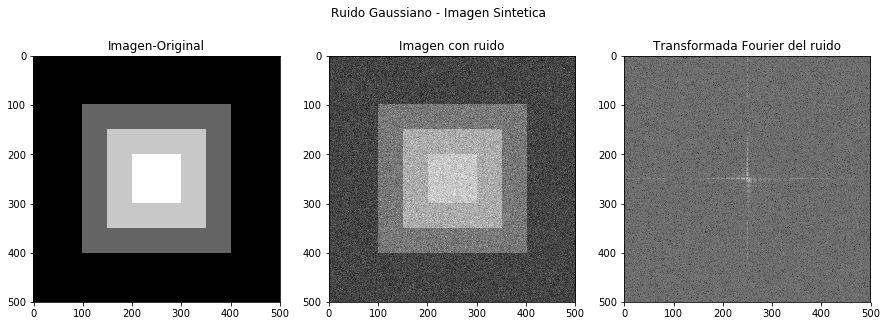

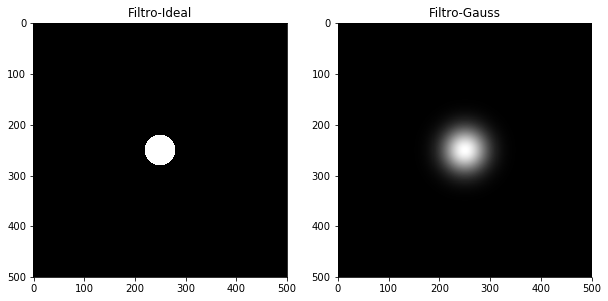

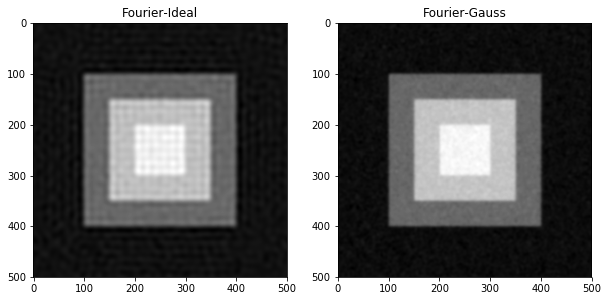

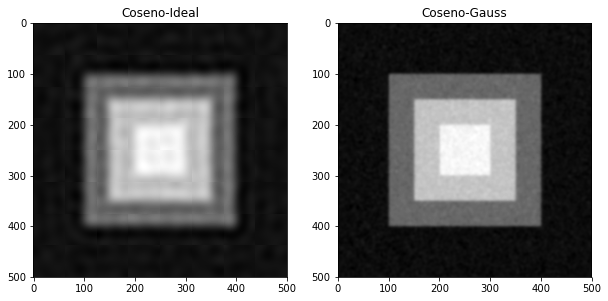

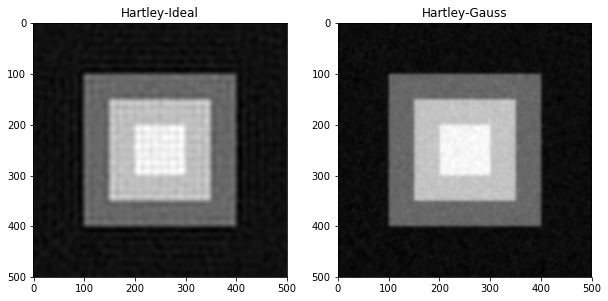

In [38]:
def ideal2d(shape, f , pxd = 1):
    pxd = float(pxd)
    rows, cols = shape
    x = np.linspace(-0.5,0.5,cols) * cols/pxd
    y = np.linspace(-0.5,0.5,rows) * rows/pxd
    radius = np.sqrt((x**2)[np.newaxis] + (y**2)[:,np.newaxis])
    filt = np.ones(shape)
    filt[radius > f] = 0
    return filt

def gauss2d_lp(shape,filt,pxd=1):
    pxd = float(pxd)
    h,w = shape
    x= np.linspace(-0.5,0.5,w)*w/pxd
    y= np.linspace(-0.5,0.5,h)*h/pxd
    radio=np.sqrt((x**2)[np.newaxis] + (y**2)[:, np.newaxis])
    
    pot=-0.5*(radio**2)/(filt**2)
    f=np.exp(pot)
    return f
def salt_peper(size,salt = 253,peper = 3):
    generator = np.random.randint(0,255,size)
    noise = np.zeros(size)
    noise[generator <= peper] = 0
    noise[generator >= salt] = 255
    return noise
    
    
gaussian_noise = np.zeros((500, 500))
cv2.randn(gaussian_noise,128,30);
img_noise = check + gaussian_noise

tt = fft(img_noise)
filter_mat = ideal2d(gaussian_noise.shape,30)
filter_mat2 = gauss2d_lp(gaussian_noise.shape,30)

img_filterI = ifft(fft(img_noise)*filter_mat)
img_filterG = ifft(fft(img_noise)*filter_mat2)

#Transformada del coseno
img_2_filterI = ict(ctt(img_noise)*filter_mat)
img_2_filterG = ifft(fft(img_noise)*filter_mat2)

#Transformada de harley

img_3_filterI = iht(ht(img_noise)*filter_mat)
img_3_filterG = ifft(fft(img_noise)*filter_mat2)

plt.figure(1,figsize=(15,5))
plt.suptitle('Ruido Gaussiano - Imagen Sintetica')
plt.subplot(131), plt.imshow(check, cmap=plt.cm.gray), plt.title('Imagen-Original')
plt.subplot(132), plt.imshow(img_noise, cmap=plt.cm.gray), plt.title('Imagen con ruido')
plt.subplot(133), plt.imshow(20*np.log(abs(tt)), cmap=plt.cm.gray), plt.title('Transformada Fourier del ruido')
plt.show()

plt.figure(2,figsize=(10,5))
plt.subplot(121), plt.imshow(filter_mat, cmap=plt.cm.gray), plt.title('Filtro-Ideal')
plt.subplot(122), plt.imshow(filter_mat2, cmap=plt.cm.gray), plt.title('Filtro-Gauss')
plt.show()

plt.figure(3,figsize=(10,5))
plt.subplot(121), plt.imshow(img_filterI, cmap=plt.cm.gray), plt.title('Fourier-Ideal')
plt.subplot(122), plt.imshow(img_filterG, cmap=plt.cm.gray), plt.title('Fourier-Gauss')
plt.show()

plt.figure(4,figsize=(10,5))
plt.subplot(121), plt.imshow(img_2_filterI, cmap=plt.cm.gray), plt.title('Coseno-Ideal')
plt.subplot(122), plt.imshow(img_2_filterG, cmap=plt.cm.gray), plt.title('Coseno-Gauss')
plt.show()

plt.figure(5,figsize=(10,5))
plt.subplot(121), plt.imshow(img_3_filterI, cmap=plt.cm.gray), plt.title('Hartley-Ideal')
plt.subplot(122), plt.imshow(img_3_filterG, cmap=plt.cm.gray), plt.title('Hartley-Gauss')
plt.show()


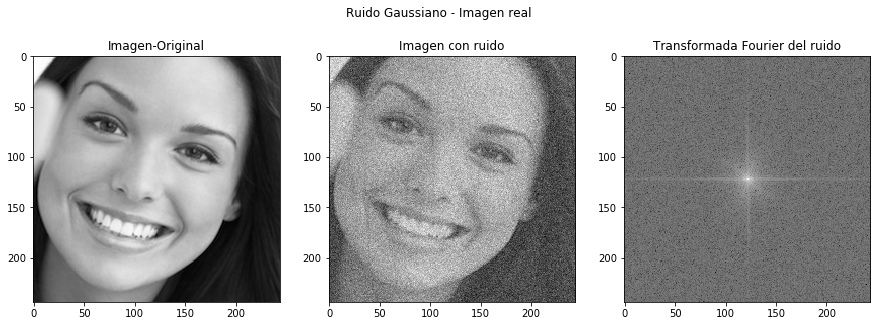

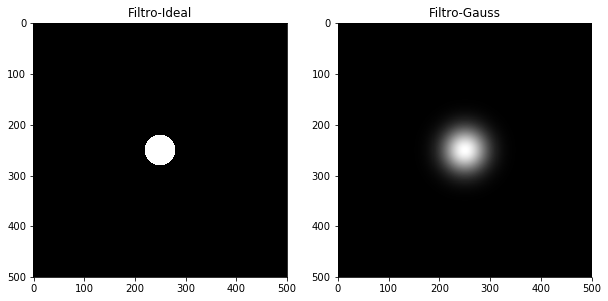

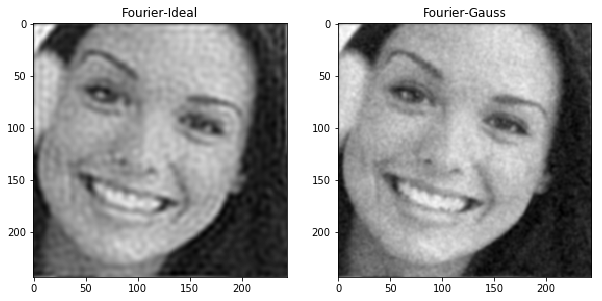

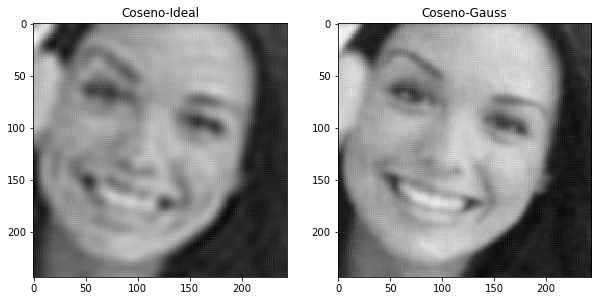

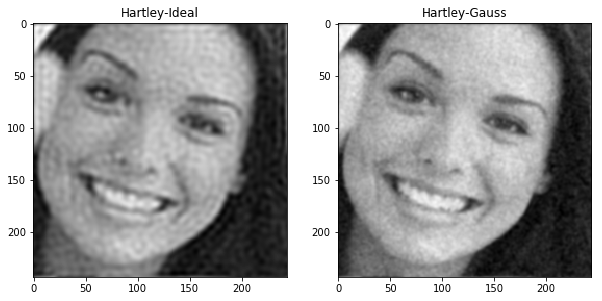

In [118]:
height, width=img.shape[:2]
gaussian_noise_r = np.zeros((height, width))
cv2.randn(gaussian_noise_r,128,30);
img_noise_r = img + gaussian_noise_r

tt_r = fft(img_noise_r)
filter_mat_r = ideal2d(gaussian_noise_r.shape,30)
filter_mat2_r = gauss2d_lp(gaussian_noise_r.shape,30)

img_filterI_r = ifft(fft(img_noise_r)*filter_mat_r)
img_filterG_r = ifft(fft(img_noise_r)*filter_mat2_r)

#Transformada del coseno
img_2_filterI_r = ict(ctt(img_noise_r)*filter_mat_r)
img_2_filterG_r = ict(ctt(img_noise_r)*filter_mat2_r)

#Transformada de harley
img_3_filterI_r = iht(ht(img_noise_r)*filter_mat_r)
img_3_filterG_r = iht(ht(img_noise_r)*filter_mat2_r)

plt.figure(1,figsize=(15,5))
plt.suptitle('Ruido Gaussiano - Imagen real')
plt.subplot(131), plt.imshow(img, cmap=plt.cm.gray), plt.title('Imagen-Original')
plt.subplot(132), plt.imshow(img_noise_r, cmap=plt.cm.gray), plt.title('Imagen con ruido')
plt.subplot(133), plt.imshow(20*np.log(abs(tt_r)), cmap=plt.cm.gray), plt.title('Transformada Fourier del ruido')
plt.show()

plt.figure(2,figsize=(10,5))
plt.subplot(121), plt.imshow(filter_mat, cmap=plt.cm.gray), plt.title('Filtro-Ideal')
plt.subplot(122), plt.imshow(filter_mat2, cmap=plt.cm.gray), plt.title('Filtro-Gauss')
plt.show()

plt.figure(3,figsize=(10,5))
plt.subplot(121), plt.imshow(img_filterI_r, cmap=plt.cm.gray), plt.title('Fourier-Ideal')
plt.subplot(122), plt.imshow(img_filterG_r, cmap=plt.cm.gray), plt.title('Fourier-Gauss')
plt.show()

plt.figure(4,figsize=(10,5))
plt.subplot(121), plt.imshow(img_2_filterI_r, cmap=plt.cm.gray), plt.title('Coseno-Ideal')
plt.subplot(122), plt.imshow(img_2_filterG_r, cmap=plt.cm.gray), plt.title('Coseno-Gauss')
plt.show()

plt.figure(5,figsize=(10,5))
plt.subplot(121), plt.imshow(img_3_filterI_r, cmap=plt.cm.gray), plt.title('Hartley-Ideal')
plt.subplot(122), plt.imshow(img_3_filterG_r, cmap=plt.cm.gray), plt.title('Hartley-Gauss')
plt.show()


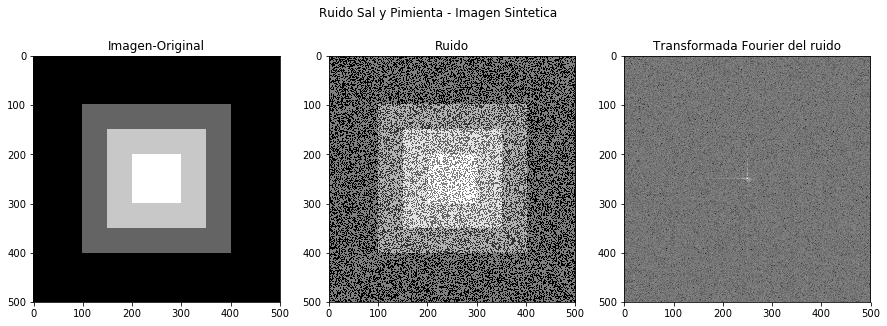

ValueError: operands could not be broadcast together with shapes (500,500) (244,244) 

In [119]:
#Sal y pimienta
sp_noise = salt_peper(check.shape,100,100)
imgSP_noise = check + sp_noise
tt2 = fft(imgSP_noise)


plt.figure(1,figsize=(15,5))
plt.suptitle('Ruido Sal y Pimienta - Imagen Sintetica')
plt.subplot(131), plt.imshow(check, cmap=plt.cm.gray), plt.title('Imagen-Original')
plt.subplot(132), plt.imshow(imgSP_noise, cmap=plt.cm.gray), plt.title('Ruido')
plt.subplot(133), plt.imshow(20*np.log(abs(tt2)), cmap=plt.cm.gray), plt.title('Transformada Fourier del ruido')
plt.show()

imgSP_filterI = ifft(fft(img_noise)*filter_mat)
imgSP_filterG = ifft(fft(img_noise)*filter_mat2)

#Transformada del coseno
imgSP_2_filterI = ict(ctt(img_noise)*filter_mat)
imgSP_2_filterG = ict(ctt(img_noise)*filter_mat2)

#Transformada de harley

imgSP_3_filterI = iht(ht(img_noise)*filter_mat)
imgSP_3_filterG = iht(ht(img_noise)*filter_mat2)

#Transformada de Seno
imgSP_4_filterI = ist(stt(img_noise)*filter_mat)
imgSP_4_filterG = ist(stt(img_noise)*filter_mat2)

plt.figure(3,figsize=(10,5))
plt.subplot(121), plt.imshow(imgSP_filterI, cmap=plt.cm.gray), plt.title('Fourier-Ideal')
plt.subplot(122), plt.imshow(imgSP_filterG, cmap=plt.cm.gray), plt.title('Fourier-Gauss')
plt.show()

plt.figure(4,figsize=(10,5))
plt.subplot(121), plt.imshow(imgSP_2_filterI, cmap=plt.cm.gray), plt.title('Coseno-Ideal')
plt.subplot(122), plt.imshow(imgSP_2_filterG, cmap=plt.cm.gray), plt.title('Coseno-Gauss')
plt.show()

plt.figure(5,figsize=(10,5))
plt.subplot(121), plt.imshow(imgSP_3_filterI, cmap=plt.cm.gray), plt.title('Hartley-Ideal')
plt.subplot(122), plt.imshow(imgSP_3_filterG, cmap=plt.cm.gray), plt.title('Hartley-Gauss')
plt.show()

plt.figure(6,figsize=(10,5))
plt.subplot(121), plt.imshow(imgSP_4_filterI, cmap=plt.cm.gray), plt.title('Hartley-Ideal')
plt.subplot(122), plt.imshow(imgSP_4_filterG, cmap=plt.cm.gray), plt.title('Hartley-Gauss')
plt.show()

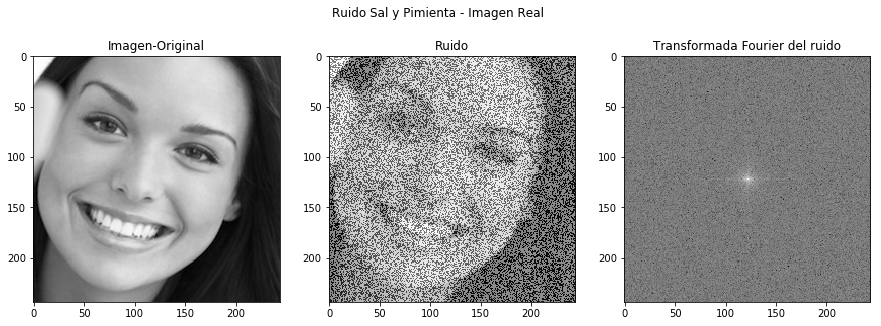

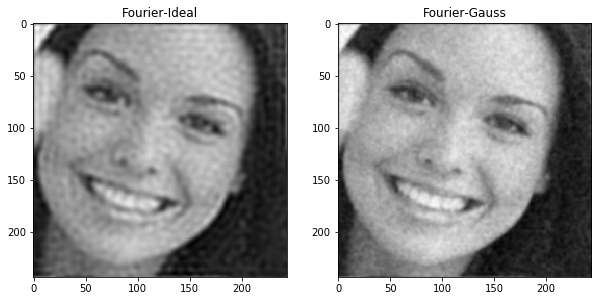

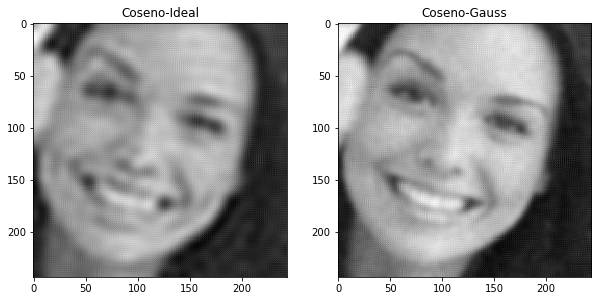

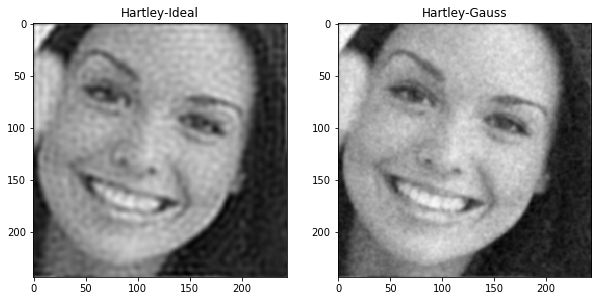

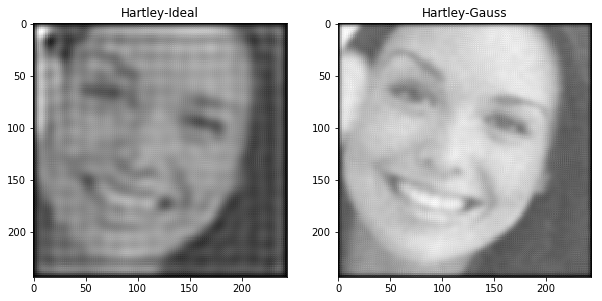

In [117]:
#Sal y pimienta
sp_noise_r = salt_peper(img.shape,100,100)
imgSP_noise_r = img + sp_noise_r
tt2_r = fft(imgSP_noise_r)


plt.figure(1,figsize=(15,5))
plt.suptitle('Ruido Sal y Pimienta - Imagen Real')
plt.subplot(131), plt.imshow(img, cmap=plt.cm.gray), plt.title('Imagen-Original')
plt.subplot(132), plt.imshow(imgSP_noise_r, cmap=plt.cm.gray), plt.title('Ruido')
plt.subplot(133), plt.imshow(20*np.log(abs(tt2_r)), cmap=plt.cm.gray), plt.title('Transformada Fourier del ruido')
plt.show()

imgSP_filterI_r = ifft(fft(img_noise_r)*filter_mat_r)
imgSP_filterG_r = ifft(fft(img_noise_r)*filter_mat2_r)

#Transformada del coseno
imgSP_2_filterI_r = ict(ctt(img_noise_r)*filter_mat_r)
imgSP_2_filterG_r = ict(ctt(img_noise_r)*filter_mat2_r)

#Transformada de harley

imgSP_3_filterI_r = iht(ht(img_noise_r)*filter_mat_r)
imgSP_3_filterG_r = iht(ht(img_noise_r)*filter_mat2_r)

#Transformada de Seno
imgSP_4_filterI_r = ist(stt(img_noise_r)*filter_mat_r)
imgSP_4_filterG_r = ist(stt(img_noise_r)*filter_mat2_r)

plt.figure(3,figsize=(10,5))
plt.subplot(121), plt.imshow(imgSP_filterI_r, cmap=plt.cm.gray), plt.title('Fourier-Ideal')
plt.subplot(122), plt.imshow(imgSP_filterG_r, cmap=plt.cm.gray), plt.title('Fourier-Gauss')
plt.show()

plt.figure(4,figsize=(10,5))
plt.subplot(121), plt.imshow(imgSP_2_filterI_r, cmap=plt.cm.gray), plt.title('Coseno-Ideal')
plt.subplot(122), plt.imshow(imgSP_2_filterG_r, cmap=plt.cm.gray), plt.title('Coseno-Gauss')
plt.show()

plt.figure(5,figsize=(10,5))
plt.subplot(121), plt.imshow(imgSP_3_filterI_r, cmap=plt.cm.gray), plt.title('Hartley-Ideal')
plt.subplot(122), plt.imshow(imgSP_3_filterG_r, cmap=plt.cm.gray), plt.title('Hartley-Gauss')
plt.show()

plt.figure(6,figsize=(10,5))
plt.subplot(121), plt.imshow(imgSP_4_filterI_r, cmap=plt.cm.gray), plt.title('Hartley-Ideal')
plt.subplot(122), plt.imshow(imgSP_4_filterG_r, cmap=plt.cm.gray), plt.title('Hartley-Gauss')
plt.show()

<h2>Punto 3 - Analisis de reduccion de ruido</h2>
<p>Para el analisis de reduccion de ruido, utilizamos una imagen sintetica y una imagen real, y aplicamos cada tranformada (Fourier, Coseno y Hartley) </p>
  <li>Luego pasamos un filtro pasa-bajo (Ideal y Gaussiano) a cada transformada</li>
  <li>Este filtro tiene forma circular y para las 2 imagenes (sintetica y real) utilizamos un radio de 30 pixeles </li>
  <li>Se aplican 2 tipos de ruidos: Gausiano y Sal y Pimienta</li>
<br>
  <p>De las imagenes podemos concluir que: </p>
  <li>Todos los filtros funcionan de mejor manera para el ruido Sal y pimienta</li>
  <li>El filtro pasa-bajo gaussiano presenta buenos resultados sin importar la transformada para las 2 imagenes, ademas de que son muy similares</li>
  <li>El filtro pasa-bajo ideal es el que nos permite ver las diferencias entre transformadas, situando a la del coseno como la de peor calidad, la diferencia entre Hartley y Fourier es casi imperceptible (calidad aceptable aunque con el fenomeno de ondas)</li>
  
  <li>Tambien podemos ver que usando la transformada del seno obtenemos un resultado que la imagen pierde mucha calidad</li>
  


